In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [21]:
# generating synthetic data
X, y = make_blobs(n_samples=500, centers=5, cluster_std=1.0, random_state=42)

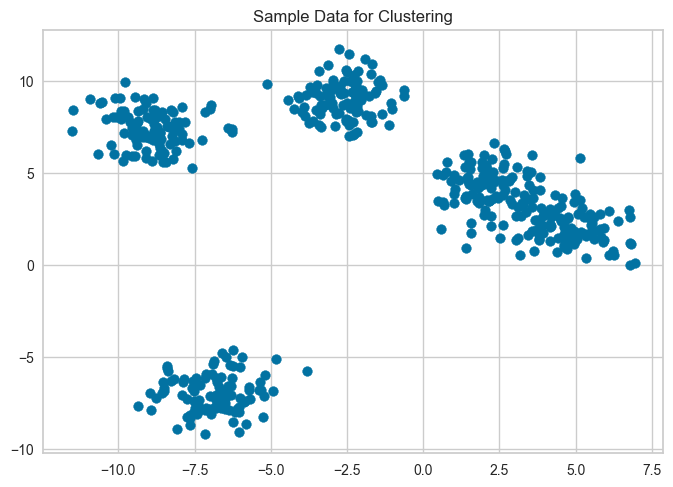

In [22]:
plt.scatter(X[:, 0], X[:, 1])
plt.title("Sample Data for Clustering")
plt.show()

## K-Means Clustering

In [23]:
from sklearn.cluster import KMeans

In [24]:
# k-means clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
y_kmeans = kmeans.fit_predict(X)

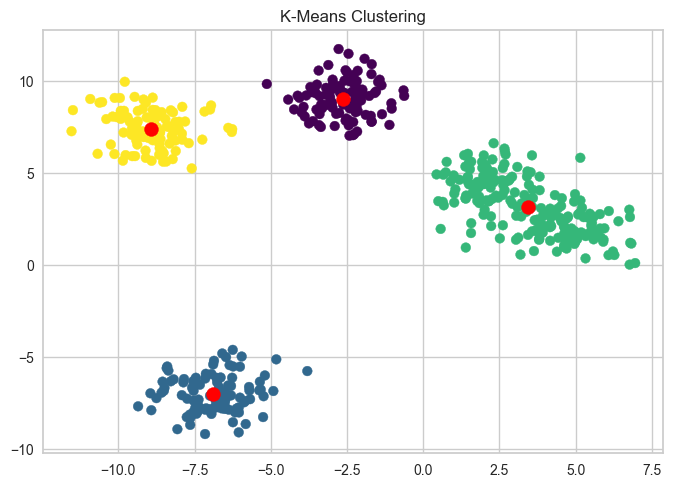

In [25]:
# plotting
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red')
plt.title("K-Means Clustering")
plt.show()

## Elbow Method

In [26]:
from yellowbrick.cluster import KElbowVisualizer

Elbow Method to determine the number of clusters to be formed


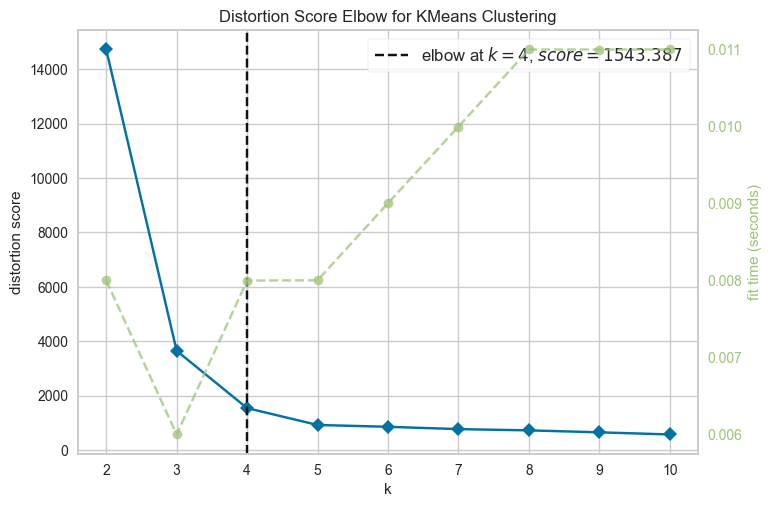

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
print("Elbow Method to determine the number of clusters to be formed")
Elbow_M = KElbowVisualizer(KMeans(n_init='auto'), k=10)
Elbow_M.fit(X)
Elbow_M.show()

## Agglomeretive Clustering

In [28]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [29]:
agglom = AgglomerativeClustering(n_clusters=4)
y_agglom = agglom.fit_predict(X)

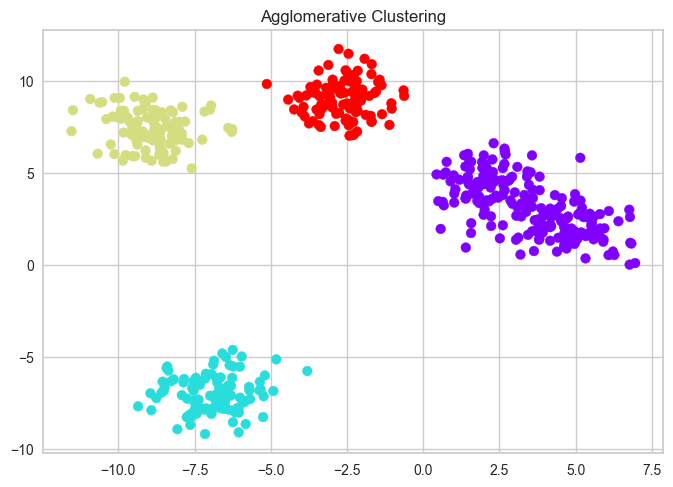

In [30]:
plt.scatter(X[:, 0], X[:, 1], c=y_agglom, cmap='rainbow')
plt.title("Agglomerative Clustering")
plt.show()


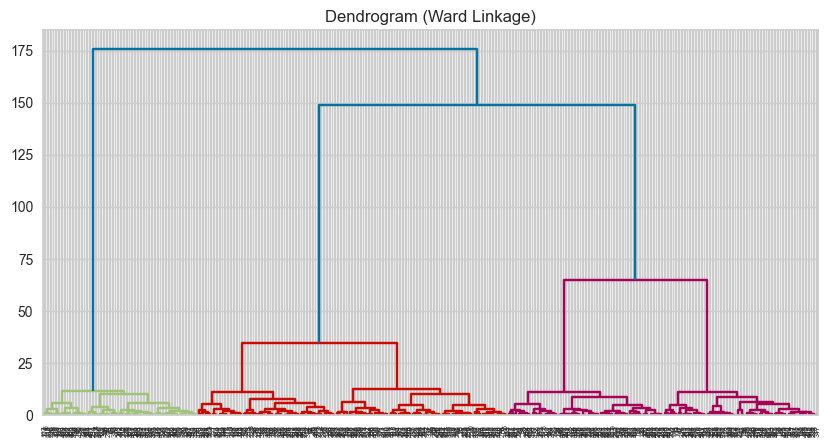

In [31]:
# dendrogram
Z = linkage(X, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title("Dendrogram (Ward Linkage)")
plt.show()

## Devisive Clusterin

In [32]:
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram

In [33]:
Z = linkage(X, method='complete')

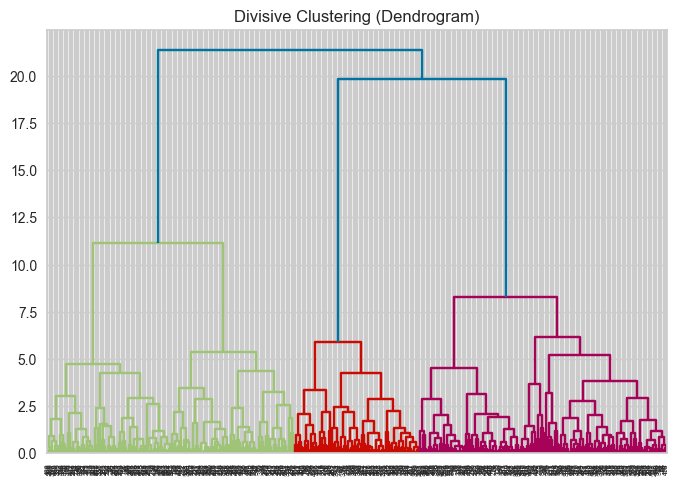

In [34]:
# dendrogram
dendrogram(Z)
plt.title("Divisive Clustering (Dendrogram)")
plt.show()

In [35]:
# simulate divisive clustering by splitting clusters based on threshold distance
max_d = 8
clusters_divisive = fcluster(Z, max_d, criterion='distance')

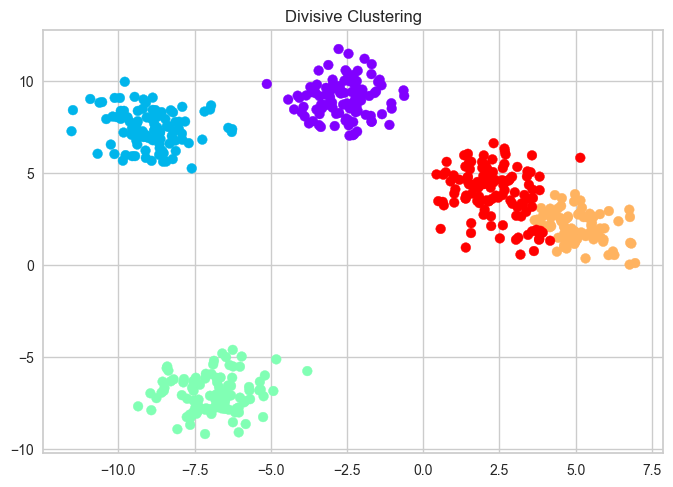

In [36]:
plt.scatter(X[:, 0], X[:, 1], c=clusters_divisive, cmap='rainbow')
plt.title("Divisive Clustering")
plt.show()

## K-Modes Clustering

In [37]:
!pip install kmodes

'pip' is not recognized as an internal or external command,
operable program or batch file.


In [38]:
import pandas as pd
from kmodes.kmodes import KModes

# Creating a simple categorical dataset
data = {
    'Customer_ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age_Group': ['Young', 'Middle-Aged', 'Senior', 'Young', 'Middle-Aged', 'Senior', 'Young', 'Middle-Aged', 'Senior', 'Young'],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Income_Level': ['Low', 'Medium', 'High', 'Low', 'High', 'Low', 'Medium', 'Low', 'High', 'Low'],
    'Location': ['Urban', 'Suburban', 'Rural', 'Urban', 'Urban', 'Suburban', 'Rural', 'Urban', 'Suburban', 'Rural'],
    'Product_Purchased': ['Electronics', 'Clothing', 'Furniture', 'Cosmetics', 'Electronics', 'Furniture', 'Clothing', 'Cosmetics', 'Electronics', 'Furniture']
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Selecting only categorical columns for clustering
categorical_data = df[['Age_Group', 'Gender', 'Income_Level', 'Location', 'Product_Purchased']]

# Initialize the K-modes model with n_clusters = 3
km = KModes(n_clusters=3, init='random', n_init=10, verbose=1)

# Fit the model on the categorical data
clusters = km.fit_predict(categorical_data)


ModuleNotFoundError: No module named 'kmodes'

In [ ]:
# Add the cluster labels to the dataframe
df['Cluster'] = clusters

# Display the results
print(df)
print("\nCluster centroids:")
print(km.cluster_centroids_)

   Customer_ID    Age_Group  Gender Income_Level  Location Product_Purchased  \
0            1        Young    Male          Low     Urban       Electronics   
1            2  Middle-Aged  Female       Medium  Suburban          Clothing   
2            3       Senior    Male         High     Rural         Furniture   
3            4        Young  Female          Low     Urban         Cosmetics   
4            5  Middle-Aged    Male         High     Urban       Electronics   
5            6       Senior  Female          Low  Suburban         Furniture   
6            7        Young    Male       Medium     Rural          Clothing   
7            8  Middle-Aged  Female          Low     Urban         Cosmetics   
8            9       Senior    Male         High  Suburban       Electronics   
9           10        Young  Female          Low     Rural         Furniture   

   Cluster  
0        0  
1        2  
2        1  
3        0  
4        1  
5        0  
6        2  
7        0  
8 

In [ ]:
print('K-Modes Inertia (Dissimlarity): ', km.cost_)

K-Modes Inertia (Dissimlarity):  15.0


## Evaluation

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
print("K-Means Silhouette Score", silhouette_score(X, y_kmeans)) 

K-Means Silhouette Score 0.7328381899726921
